In [2]:
import kaggle

OSError: ignored

In [3]:
! mv kaggle.json /root/.kaggle

In [4]:
import kaggle

In [5]:
! kaggle competitions download -c dogs-vs-cats

 99% 807M/812M [00:05<00:00, 32.2MB/s]
100% 812M/812M [00:06<00:00, 139MB/s] 


In [6]:
! unzip -q dogs-vs-cats.zip

In [7]:
! unzip -q train.zip

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [9]:
import os
os.mkdir("train_data")
os.mkdir("train_data/cat")
os.mkdir("train_data/dog")

In [10]:
import shutil
source_folder = "train/"
dest_dog = "train_data/dog"
dest_cat = "train_data/cat"

In [11]:
for imageName in os.listdir(source_folder):
  if "dog" in imageName:
    shutil.copy(source_folder + imageName, dest_dog)
  else:
    shutil.copy(source_folder + imageName , dest_cat)

In [12]:
len(os.listdir("train_data/dog"))

12500

In [13]:
idg = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.1, rescale=1/255.0)

In [14]:
batch_size = 512
train_idg = idg.flow_from_directory(directory="train_data",
                                    target_size=(150, 150),
                                    batch_size=batch_size,
                                    subset="training")

Found 22500 images belonging to 2 classes.


In [15]:
val_idg = idg.flow_from_directory(directory="train_data",
                                  target_size=(150, 150),
                                  batch_size=batch_size,
                                  subset='validation')

Found 2500 images belonging to 2 classes.


In [16]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input((150, 150, 3), name="InputLayer"))
model.add(tf.keras.layers.Flatten(name="Flat"))
model.add(tf.keras.layers.Dense(512, activation=tf.keras.activations.relu, name="FirstLayer"))
model.add(tf.keras.layers.Dense(64, activation=tf.keras.activations.relu, name="SecondLayer"))
model.add(tf.keras.layers.Dense(2, activation=tf.keras.activations.softmax, name="OutputLayer"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flat (Flatten)              (None, 67500)             0         
                                                                 
 FirstLayer (Dense)          (None, 512)               34560512  
                                                                 
 SecondLayer (Dense)         (None, 64)                32832     
                                                                 
 OutputLayer (Dense)         (None, 2)                 130       
                                                                 
Total params: 34,593,474
Trainable params: 34,593,474
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(tf.keras.optimizers.SGD(), tf.keras.losses.categorical_crossentropy,
              metrics = ['acc'])

In [18]:
rel=model.fit(train_idg, batch_size=batch_size, validation_data=val_idg, epochs=10)

Epoch 1/10
44/44 [==============================] - 143s 3s/step - loss: 0.8083 - acc: 0.5295 - val_loss: 0.6839 - val_acc: 0.5816
Epoch 2/10
44/44 [==============================] - 153s 3s/step - loss: 0.6836 - acc: 0.5567 - val_loss: 0.6791 - val_acc: 0.5884
Epoch 3/10
44/44 [==============================] - 142s 3s/step - loss: 0.6774 - acc: 0.5796 - val_loss: 0.6767 - val_acc: 0.5640
Epoch 4/10
44/44 [==============================] - 140s 3s/step - loss: 0.6750 - acc: 0.5850 - val_loss: 0.6703 - val_acc: 0.5916
Epoch 5/10
44/44 [==============================] - 150s 3s/step - loss: 0.6646 - acc: 0.5988 - val_loss: 0.6837 - val_acc: 0.5720
Epoch 6/10
44/44 [==============================] - 147s 3s/step - loss: 0.6697 - acc: 0.5899 - val_loss: 0.7251 - val_acc: 0.5048
Epoch 7/10
44/44 [==============================] - 141s 3s/step - loss: 0.6618 - acc: 0.6039 - val_loss: 0.6577 - val_acc: 0.6060
Epoch 8/10
44/44 [==============================] - 151s 3s/step - loss: 0.6628 - a

In [19]:
models = tf.keras.models.Sequential()
models.add(tf.keras.layers.Input((150, 150, 3), name="InputLayer"))
models.add(tf.keras.layers.Flatten(name="Flat"))
models.add(tf.keras.layers.Dense(512, activation=tf.keras.activations.sigmoid, name="FirstLayer"))
models.add(tf.keras.layers.Dense(64, activation=tf.keras.activations.sigmoid, name="SecondLayer"))
models.add(tf.keras.layers.Dense(2, activation=tf.keras.activations.softmax, name="OutputLayer"))
models.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flat (Flatten)              (None, 67500)             0         
                                                                 
 FirstLayer (Dense)          (None, 512)               34560512  
                                                                 
 SecondLayer (Dense)         (None, 64)                32832     
                                                                 
 OutputLayer (Dense)         (None, 2)                 130       
                                                                 
Total params: 34,593,474
Trainable params: 34,593,474
Non-trainable params: 0
_________________________________________________________________


In [20]:
models.compile(tf.keras.optimizers.SGD(), tf.keras.losses.categorical_crossentropy,
              metrics = ['acc'])

In [21]:
sig=models.fit(train_idg, batch_size=batch_size, validation_data=val_idg, epochs=10)

Epoch 1/10
44/44 [==============================] - 155s 3s/step - loss: 0.6966 - acc: 0.5163 - val_loss: 0.6906 - val_acc: 0.5248
Epoch 2/10
44/44 [==============================] - 141s 3s/step - loss: 0.6875 - acc: 0.5477 - val_loss: 0.6876 - val_acc: 0.5284
Epoch 3/10
44/44 [==============================] - 149s 3s/step - loss: 0.6842 - acc: 0.5649 - val_loss: 0.6843 - val_acc: 0.5668
Epoch 4/10
44/44 [==============================] - 151s 3s/step - loss: 0.6815 - acc: 0.5705 - val_loss: 0.6839 - val_acc: 0.5748
Epoch 5/10
44/44 [==============================] - 152s 3s/step - loss: 0.6792 - acc: 0.5785 - val_loss: 0.6802 - val_acc: 0.5648
Epoch 6/10
44/44 [==============================] - 151s 3s/step - loss: 0.6774 - acc: 0.5835 - val_loss: 0.6785 - val_acc: 0.5832
Epoch 7/10
44/44 [==============================] - 142s 3s/step - loss: 0.6759 - acc: 0.5871 - val_loss: 0.6767 - val_acc: 0.5864
Epoch 8/10
44/44 [==============================] - 149s 3s/step - loss: 0.6741 - a

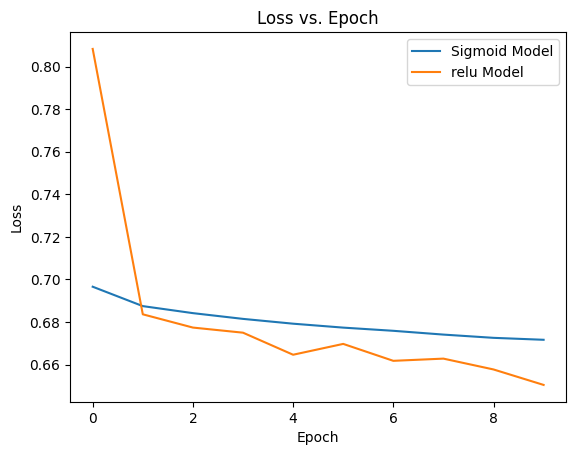

In [23]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(sig.history['loss'], label='Sigmoid Model')
plt.plot(rel.history['loss'], label='relu Model')

plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


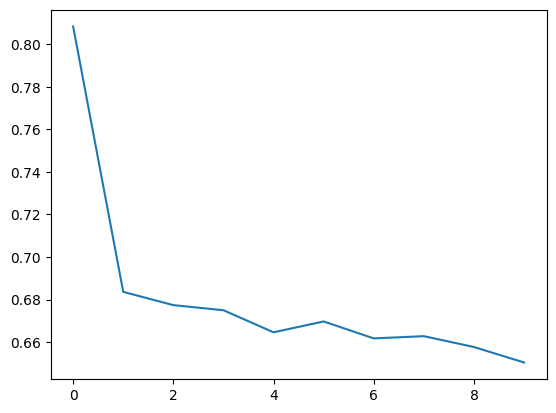

In [22]:
plt.plot(rel.history['loss'], label='relu Model')
